<a href="https://colab.research.google.com/github/AmrRagab0/Hybrid-Image/blob/master/Hybrid_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy.signal import convolve2d, correlate2d
import cv2


# from scipy import fspecial
from numpy import pi, exp, sqrt
from skimage import io, img_as_ubyte, img_as_float32
from skimage.transform import rescale
import scipy.fftpack as fp
import time


from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean


In [ ]:
from scipy import ndimage
# from matplotlib import Axes3D

In [ ]:
def convolve(img,fil):
  #assert fil.shape[0] == fil.shape[1],"filter is not symmetric in dimensions"
  img_size = img.shape
  fil_L,fil_W = fil.shape

  
  #fil_center = math.ceil(fil.shape[0]/2)-1 # this is the center of the filter (1d) , the -1 is because index starts at 0
  # size of conv is  image_size - (filter_size - 1)

  L = img_size[0] - fil_L +1
  W = img_size[1] - fil_W +1
  conv_size = img.shape[0] - (fil_L-1)
  #conv = np.zeros((img.shape[0] - (fil_L-1),img.shape[1] - (fil_W-1)))

  conv = np.zeros((L,W))
  for i in range(L):
    for j in range(W):
      conv[i,j] = np.sum(img[i:i+fil_L,j:j+fil_L] * fil)

  return conv

In [ ]:
def padding(img,size1,size2):  # FOR RGB IMAGES
  # perform reflective padding on image
  padded = np.pad(img,((size1,size1),(size2,size2),(0,0)),'wrap')

  return padded

In [ ]:
def padding_1d(img,size1,size2):   # FOR GREY IMAGES ONLY
  # perform reflective padding on image
  padded = np.pad(img,((size1,size1),(size2,size2)),'wrap')

  return padded

In [ ]:
def create_mean_filter(ksize):   # creating the mean filter to apply to our image
  filter = np.ones((ksize,ksize))
  filter = (1/ksize**2) * filter
  return filter

In [ ]:
photo = cv2.imread("original.png",cv2.IMREAD_COLOR)   # Photo called original from lab 2 must be uploaded to session
photo = cv2.cvtColor(photo,cv2.COLOR_BGR2RGB)

def create_mean_filter(ksize):   # creating the mean filter to apply to our image
  filter = np.ones((ksize,ksize))
  filter = (1/ksize**2) * filter
  return filter

five_box = create_mean_filter(5)  # a mean filter of size 5x5

photo = np.array(photo)
mean_f_img = np.array(photo)

# using correlate function to validate our own convolve function
mean_f_img[:,:,0] = correlate2d(photo[:,:,0],five_box,'same')  
mean_f_img[:,:,1] = correlate2d(photo[:,:,1],five_box,'same')
mean_f_img[:,:,2] = correlate2d(photo[:,:,2],five_box,'same')


conv_size = photo.shape[0] - five_box.shape[0] + 1
conv_img = np.zeros((conv_size,conv_size,3))  # creating a 3 dimension




conv_img[:,:,0] = convolve(photo[:,:,0],five_box)
conv_img[:,:,1] = convolve(photo[:,:,1],five_box)
conv_img[:,:,2] = convolve(photo[:,:,2],five_box)

print("Convolved image size",conv_img.shape)
print("correlated image size: ",mean_f_img.shape)
 
plt.figure(figsize=(25,25))
plt.subplot(1,3,3)
plt.imshow(mean_f_img)
plt.title("Image using built-in correlate",fontsize=20)
plt.subplot(1,3,2)
conv_img = conv_img.astype('uint8')
plt.imshow(conv_img)
plt.title("Implemented function Image",fontsize=20)
plt.subplot(1,3,1)
plt.imshow(photo)
plt.title("Original Image",fontsize=20)




error: ignored

**As you can see, The output image of convolve function (that we implemented) is the same as the output of the correlate2d(built-in) function**

# Padding Image (reflected mode)

In [ ]:

padding_size = math.floor(20/2)  # 
padd_img = np.zeros((photo.shape[0]+2*padding_size,photo.shape[1]+2*padding_size,3))
print("padded image size : ",padd_img.shape)

padd_img[:,:,0] = padding_1d(photo[:,:,0],padding_size,padding_size)
padd_img[:,:,1] = padding_1d(photo[:,:,1],padding_size,padding_size)
padd_img[:,:,2] = padding_1d(photo[:,:,2],padding_size,padding_size)


padd_img = padd_img.astype('uint8')  # necessary to convert from float to int
# apparently matplotlib doesn't plot float
plt.imshow(padd_img)


**As you can see, The image is padded with the reflection**

# Low pass filter 

In [ ]:
def create_gaussian_filter(side_length, sigma):
    # side length represent the length of the kernerl assuming square kernel.
    ax = np.linspace(-(side_length - 1) / 2., (side_length- 1) / 2., side_length)
    xx, yy = np.meshgrid(ax, ax)

    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))

    return kernel / np.sum(kernel)

In [ ]:
def load_image(path):
  return img_as_float32(io.imread(path))

# ==============================================================
# ==============================================================

In [ ]:
from ctypes import sizeof
def my_imfilter(image: np.ndarray, filter: np.ndarray):
  """
  Your function should meet the requirements laid out on the project webpage.
  Apply a filter to an image. Return the filtered image.
  Inputs:
  - image -> numpy nd-array of dim (m, n, c) for RGB images or numpy nd-array of dim (m, n) for gray scale images
  - filter -> numpy nd-array of odd dim (k, l)
  Returns
  - filtered_image -> numpy nd-array of dim (m, n, c) or numpy nd-array of dim (m, n)
  Errors if:
  - filter has any even dimension -> raise an Exception with a suitable error message.
  """
  filtered_image = np.zeros_like(image)

  ##################

  frow,fcol=filter.shape
  assert (frow %2 !=0 and fcol %2 !=0 ) ,print("enter an odd dimension filter")
  pad_row=math.floor(frow/2)
  pad_col=math.floor(fcol/2)

  padded_img= padding(image,int(pad_row),int(pad_col))

  if (len(image.shape)==2):
      filtered_image= convolve(padded_img,filter)

  else:
      filtered_image[:,:,0]= convolve(padded_img[:,:,0],filter)
      filtered_image[:,:,1]= convolve(padded_img[:,:,1],filter)
      filtered_image[:,:,2]= convolve(padded_img[:,:,2],filter)


  return filtered_image

In [ ]:
def gen_hybrid_image(image1: np.ndarray, image2: np.ndarray, cutoff_frequency: float):
  """
   Inputs:
   - image1 -> The image from which to take the low frequencies.
   - image2 -> The image from which to take the high frequencies.
   - cutoff_frequency -> The standard deviation, in pixels, of the Gaussian
                         blur that will remove high frequencies.

   Task:
   - Use my_imfilter to create 'low_frequencies' and 'high_frequencies'.
   - Combine them to create 'hybrid_image'.
  """

  assert image1.shape == image2.shape

  # Steps:
  # (1) Remove the high frequencies from image1 by blurring it. The amount of
  #     blur that works best will vary with different image pairs
  # generate a gaussian kernel with mean=0 and sigma = cutoff_frequency,
  # Just a heads up but think how you can generate 2D gaussian kernel from 1D gaussian kernel

  kernel = create_gaussian_filter(int(cutoff_frequency)*2+1, cutoff_frequency)
  
  # Your code here:
  low_frequencies = my_imfilter(image1, kernel);

  # (2) Remove the low frequencies from image2. The easiest way to do this is to
  #     subtract a blurred version of image2 from the original version of image2.
  #     This will give you an image centered at zero with negative values.
  # Your code here #
  high_frequencies = image2 - my_imfilter(image2, kernel);

  # (3) Combine the high frequencies and low frequencies
  # Your code here #
  hybrid_image = low_frequencies + high_frequencies;

  # (4) At this point, you need to be aware that values larger than 1.0
  # or less than 0.0 may cause issues in the functions in Python for saving
  # images to disk. These are called in proj1_part2 after the call to 
  # gen_hybrid_image().
  # One option is to clip (also called clamp) all values below 0.0 to 0.0, 
  # and all values larger than 1.0 to 1.0.
  # (5) As a good software development practice you may add some checks (assertions) for the shapes
  # and ranges of your results. This can be performed as test for the code during development or even
  # at production!

  return low_frequencies, high_frequencies, hybrid_image

In [ ]:
def vis_hybrid_image(hybrid_image: np.ndarray):
  """
  Visualize a hybrid image by progressively downsampling the image and
  concatenating all of the images together.
  """
  scales = 5
  scale_factor = 0.5
  padding = 5
  original_height = hybrid_image.shape[0]
  num_colors = 1 if hybrid_image.ndim == 2 else 3

  output = np.copy(hybrid_image)
  cur_image = np.copy(hybrid_image)
  for scale in range(2, scales+1):
    # add padding
    output = np.hstack((output, np.ones((original_height, padding, num_colors),
                                        dtype=np.float32)))
    # downsample image
    cur_image = rescale(cur_image, scale_factor, mode='reflect',multichannel=True)
    # pad the top to append to the output
    pad = np.ones((original_height-cur_image.shape[0], cur_image.shape[1],
                   num_colors), dtype=np.float32)
    tmp = np.vstack((pad, cur_image))
    output = np.hstack((output, tmp))
  return output

In [ ]:
# image1 = cv2.imread('cat.bmp')
# image2 = cv2.imread('dog.bmp')
# rgb1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)


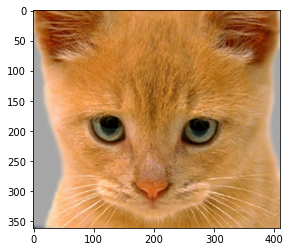

In [ ]:
image1= load_image('cat.bmp')
image2= load_image('dog.bmp')
plt.imshow(image1)
# plt.imshow(image2)

In [ ]:
image1.shape

In [ ]:
plt.imshow(image2)

In [ ]:
low,high,hybrid_image= gen_hybrid_image(image1, image2, 13)


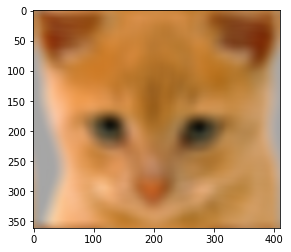

In [ ]:
plt.imshow(low)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


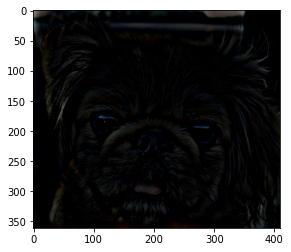

In [ ]:
plt.imshow(high)

In [ ]:
out= vis_hybrid_image(hybrid_image)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


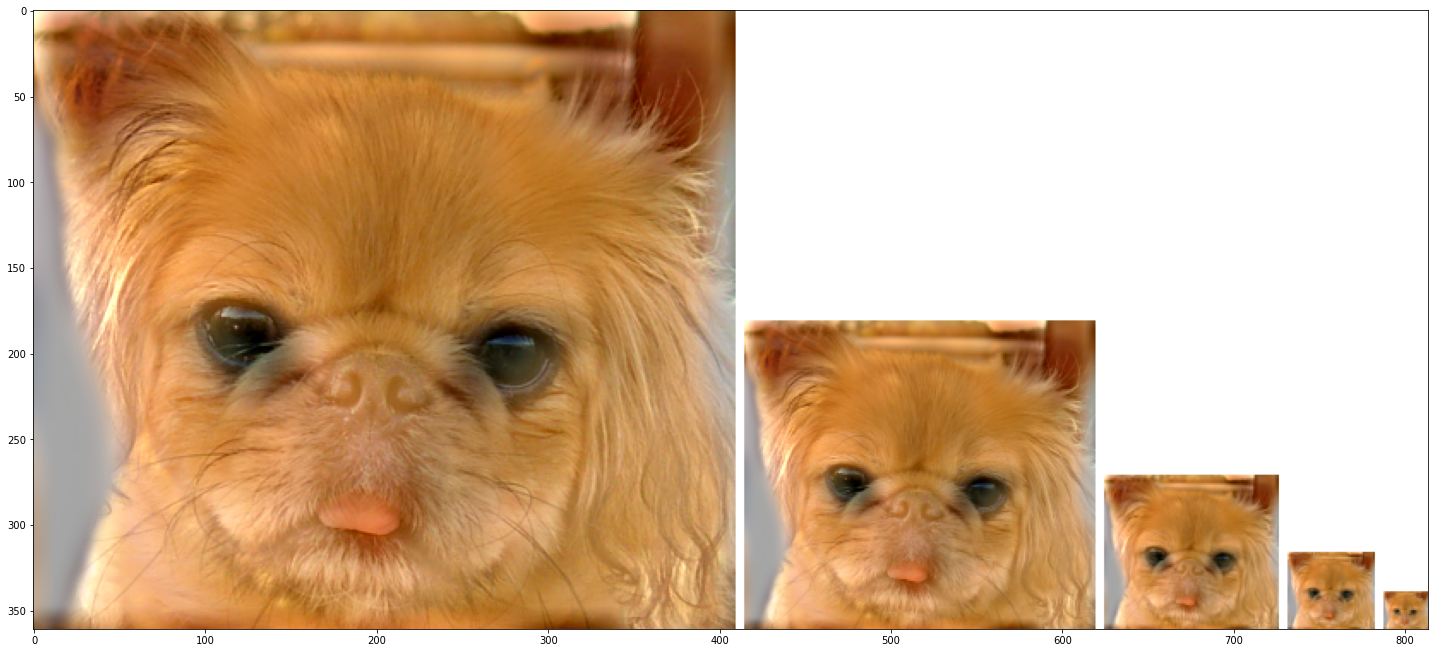

In [ ]:
plt.figure(figsize=(25,25))
plt.imshow(out)

# Another Test

In [ ]:
image3= load_image('einstein.bmp')
image4= load_image('marilyn.bmp')
plt.subplot(1,2,1)
plt.imshow(image3)
plt.subplot(1,2,2)
plt.imshow(image4)

In [ ]:
low,high,hybrid_image= gen_hybrid_image(image3, image4, 4.5)

In [ ]:
plt.subplot(1,2,1)
plt.imshow(low)
plt.title("Low")
plt.subplot(1,2,2)
plt.imshow(high)
plt.title("High")

In [ ]:
out= vis_hybrid_image(hybrid_image)
plt.figure(figsize=(25,25))
plt.imshow(out)

# Bonus

# FFT_Based Convolution #Trial1

In [ ]:
def im2freq(image):   # ignore (not used)
  freq_img = fp.rfft(fp.rfft(image, axis=0), axis=1)
  return freq_img

In [ ]:
def freq2im(freq_img): # ignore (not used)
  img = fp.irfft(fp.irfft(freq_img, axis=1), axis=0)
  return img


In [ ]:
image = cv2.imread("bird.jpg",cv2.IMREAD_COLOR) 
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

grey_image = cv2.imread("original.png",0) 
f_image = np.fft.fft2(image[:,:,1])
fshift_image = np.fft.fftshift(f_image)
magnitude_spectrum = 20*np.log(np.abs(fshift_image))

plt.subplot(2,1,1)
plt.imshow(image)
plt.subplot(2,1,2)
plt.imshow(magnitude_spectrum)



In [ ]:
def fft_transform(image):  # image[:,:,0] or image[:,:,1]
  f_image = np.fft.fft2(image)
  fshift_image = np.fft.fftshift(f_image)
  magnitude_spectrum = 20*np.log(np.abs(fshift_image))

  return magnitude_spectrum


In [ ]:
image_padded =  padding(image,math.floor(20/2),math.floor(20/2))

fft_image = np.zeros_like(image_padded)
fft_image[:,:,0] = fft_transform(image_padded[:,:,0])
fft_image[:,:,1] = fft_transform(image_padded[:,:,1])
fft_image[:,:,2] = fft_transform(image_padded[:,:,2])

plt.imshow(fft_image)




cutoff_frequency = 10
kernel = create_gaussian_filter(int(cutoff_frequency)*2+1, cutoff_frequency)

kernel_padded = padding_1d(kernel,math.floor(481/2),math.floor(599/2))

kernel_fft = fft_transform(kernel_padded)

print('fft_image size :',fft_image.shape)
print('kernel size: ',kernel_fft.shape)

out_size = image.shape[0]+kernel.shape[0]-1
print("out size :",out_size)
out = np.zeros((501,619,3))
print('out shape : ',out.shape)
print(fft_image[:501,:,0].shape)
out[:,:,0] = fft_image[:501,:,0] * kernel_fft
out[:,:,1] = fft_image[:501,:,1] * kernel_fft
out[:,:,2] = fft_image[:501,:,2] * kernel_fft

# Inverse fourier 

# Filter vs image sizes computational time complexity

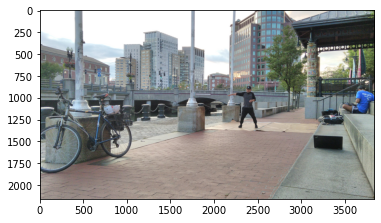

In [ ]:
ris= load_image('RISDance.jpg')
plt.imshow(ris)

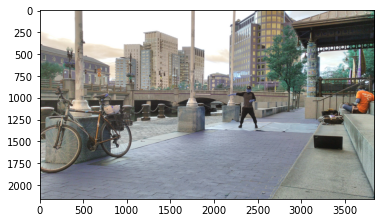

In [ ]:
# image1 = cv2.imread('cat.bmp')
ris= cv2.imread('RISDance.jpg')
plt.imshow(ris)

In [ ]:
ris.shape

In [ ]:
image = color.rgb2gray(ris)

conv_out = np.zeros(image.shape)
filter_sizes=np.linspace(3,15,7)
rescale_factor=np.linspace(0.25,3,7)

O_t=[]

for i,j in zip(filter_sizes,rescale_factor):

  variable_filter=create_mean_filter(int(i))
  image_rescaled = rescale(image, j, anti_aliasing=False)

  tic=time.time()

  conv_out=ndimage.convolve(image_rescaled, variable_filter, mode='constant', cval=0.0)

  toc=time.time()
  O_t.append(toc-tic)





In [ ]:
# plt.axes()

Text(0.5, 0.92, 'Filter vs image sizes vs time(ms) to investigate computational time complexity')

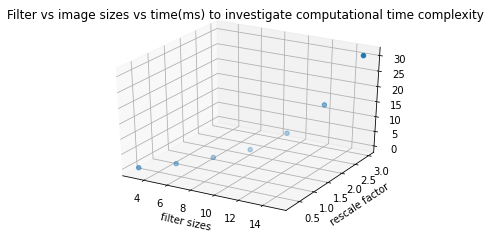

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter3D(filter_sizes,rescale_factor,O_t);
plt.xlabel("filter sizes")
plt.ylabel("rescale factor")
# plt.zlabel("time taken in (ms)")
plt.title("Filter vs image sizes vs time(ms) to investigate computational time complexity")

In [ ]:
# cv2.imwrite(out)


In [ ]:
rescale_factor=np.linspace(0.25,8,10)

O_t=[]

for j in rescale_factor:

  tic=time.time()
  image = color.rgb2gray(ris)

  image_rescaled = rescale(image, j, anti_aliasing=False)

  toc=time.time()
  O_t.append(toc-tic)





In [ ]:
plt.scatter(rescale_factor,O_t)

In [ ]:
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

image = color.rgb2gray(ris)

image_rescaled = rescale(image, 0.25, anti_aliasing=False)
image_resized = resize(image, (image.shape[0] // 4, image.shape[1] // 4),
                       anti_aliasing=True)
image_downscaled = downscale_local_mean(image, (4, 3))

fig, axes = plt.subplots(nrows=2, ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_rescaled, cmap='gray')
ax[1].set_title("Rescaled image (aliasing)")

ax[2].imshow(image_resized, cmap='gray')
ax[2].set_title("Resized image (no aliasing)")

ax[3].imshow(image_downscaled, cmap='gray')
ax[3].set_title("Downscaled image (no aliasing)")

ax[0].set_xlim(0, 512)
ax[0].set_ylim(512, 0)
plt.tight_layout()
plt.show()